# PCA Dimensionality Reduction

This notebook demonstrates the use of Principal Component Analysis (PCA) for dimensionality reduction.

This basically relates to the autoencoder MLN examples `digits-input-reconstruction-ae-layers-6-bottleneck-12` and `digits-input-reconstruction-ae-layers-14-bottleneck-6`.

Loading MNIST images from E:\edu.yaprnn\src\main\resources\digits.idx3-ubyte


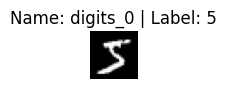

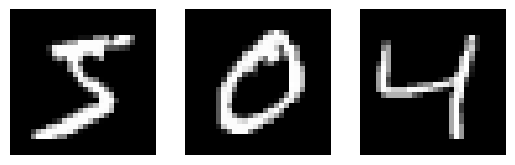

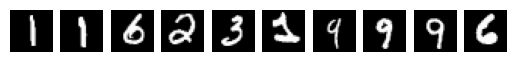

60000

In [1]:
import numpy as np
import sklearn.model_selection
from numpy.linalg import svd
from sklearn.decomposition import PCA

import mnist_utils

mnist_images, image_size, x, random_x_indices, random_feature_indices, _, _ = mnist_utils.from_mnist_images()

len(mnist_images)

## scikit-learn

PCA can be computed using sklearn, where data centering is achieved by setting `whiten=True`.

Shape of PCAs (784, 784) and shape of their variance values (784,)
Explained variance% in first 10 PCAs: [0.09704395 0.07096104 0.06169182 0.05389258 0.04867888 0.04312329
 0.03271709 0.02883962 0.02761947 0.02357051]
Cumulated explained variance% in first 10 PCAs: [0.09704395 0.16800499 0.22969681 0.2835894  0.33226827 0.37539154
 0.40810862 0.43694824 0.46456772 0.48813823]


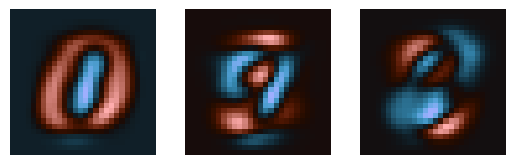

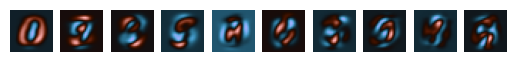

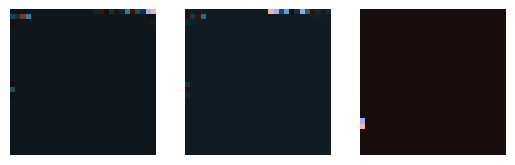

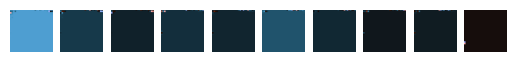

Explained variance% in last 10 PCAs: 0.0
Explained variance% in random PCAs: 0.0010581936221569777


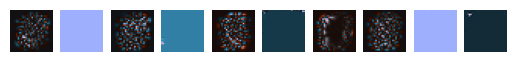

In [2]:
def sklearn_pca(data):
    model = PCA(whiten=True, random_state=42)
    model.fit(data)
    return model.components_, model.explained_variance_


def explain_model(principal_components, explained_variance):
    print(f'Shape of PCAs {principal_components.shape} and shape of their variance values {explained_variance.shape}')
    explained_variance_ratio = explained_variance / explained_variance.sum()
    print(f'Explained variance% in first 10 PCAs: {explained_variance_ratio[:10]}')
    print(f'Cumulated explained variance% in first 10 PCAs: {np.cumsum(explained_variance_ratio[:10])}')
    mnist_utils.plot_images(principal_components[:3], image_size=image_size, cmap='berlin')
    mnist_utils.plot_images(principal_components[:10], image_size=image_size, cmap='berlin')
    mnist_utils.plot_images(principal_components[-3:], image_size=image_size, cmap='berlin')
    mnist_utils.plot_images(principal_components[-10:], image_size=image_size, cmap='berlin')
    print(f'Explained variance% in last 10 PCAs: {np.sum(explained_variance_ratio[-10:])}')
    print(f'Explained variance% in random PCAs: {np.sum(explained_variance_ratio[random_feature_indices])}')
    mnist_utils.plot_images(principal_components[random_feature_indices], image_size=image_size, cmap='berlin')


components, variance_values = sklearn_pca(x)
explain_model(components, variance_values)

## Singular Value Decomposition

One method for PCA is Singular Value Decomposition (SVD). Before applying SVD, the data must be centered by subtracting the mean of each feature using `x - x.mean(axis=0)`.

Shape of PCAs (784, 784) and shape of their variance values (784,)
Explained variance% in first 10 PCAs: [0.09704664 0.07095925 0.06169089 0.0538942  0.04868798 0.04312231
 0.0327193  0.02883895 0.0276203  0.02357001]
Cumulated explained variance% in first 10 PCAs: [0.09704664 0.16800588 0.22969678 0.28359097 0.33227897 0.3754013
 0.40812057 0.43695953 0.46457982 0.48814982]


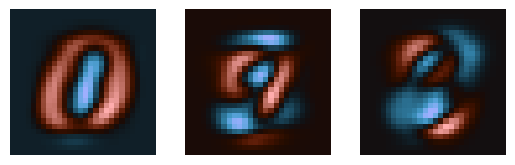

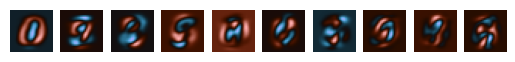

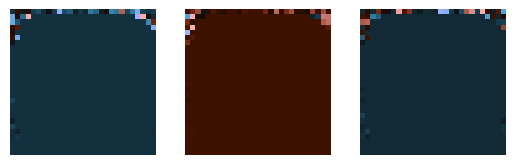

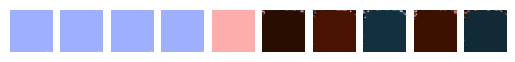

Explained variance% in last 10 PCAs: 2.4620231429583636e-33
Explained variance% in random PCAs: 0.0010581655660644174


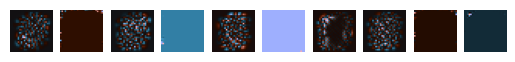

In [3]:
u, sigma, components = svd(x - x.mean(axis=0), full_matrices=False)
explain_model(components, sigma ** 2)

## Feature Space Transformation and Dimensionality Reduction

Principal components are ranked by the variance they explain. High-ranking components preserve the most relevant information when transforming into lower-dimensional feature space.

Using all components, transforming the data preserves information (ignoring minor floating-point rounding errors). Inverting the transformation with the transpose of the components restores the original data.

Using only a subset of the components, the transformation reduces the data size by removing less relevant information. Inverting the transformation can only partially restore the original data.

In [4]:
components = sklearn_pca(x)[0]

w = components[:4].T
x_feature_space = x.dot(w)
x_restored = x_feature_space.dot(w.T)
print(f'Sample x[0] in feature space: {x_feature_space[0]}')
print(f'Restored data [201:205] from feature space of sample in X: {x_restored[0][201:205]}')
print(f'Original data [201:205] of same sample in X: {x[0][201:205]}')

Sample x[0] in feature space: [ 3.4526792  1.2939343 -0.7735531  4.004884 ]
Restored data [201:205] from feature space of sample in X: [-0.01584289 -0.03426225 -0.05834198 -0.07573957]
Original data [201:205] of same sample in X: [0.         0.         0.19215687 0.93333334]


x_train shape: (48000, 784), x_test shape: (12000, 784)


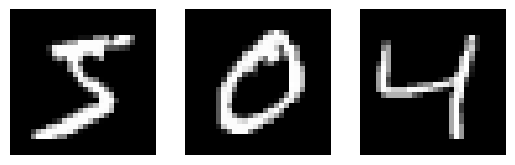

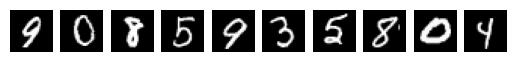

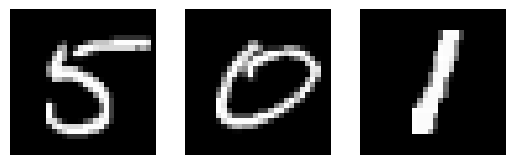

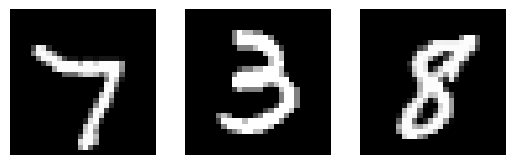

Explained variance% in first 10 PCAs in training set:  [0.0973253  0.07071964 0.06196146 0.05385704 0.04866591 0.04317547
 0.03274069 0.0288126  0.02764355 0.0235737 ]
Cumulated explained variance% in first 10 PCAs in training set:  [0.0973253  0.16804494 0.2300064  0.28386343 0.33252934 0.3757048
 0.40844548 0.43725806 0.46490163 0.48847532]


In [5]:
x_train, x_test = sklearn.model_selection.train_test_split(x, test_size=0.2, random_state=42)
print(f"x_train shape: {x_train.shape}, x_test shape: {x_test.shape}")

mnist_utils.plot_images(x[:3], image_size=image_size, cmap='gray')
mnist_utils.plot_images(x[random_x_indices], image_size=image_size, cmap='gray')
mnist_utils.plot_images(x_train[:3], image_size=image_size, cmap='gray')
mnist_utils.plot_images(x_test[:3], image_size=image_size, cmap='gray')

components, variance_values = sklearn_pca(x_train)
variance_prop = variance_values / variance_values.sum()
print("Explained variance% in first 10 PCAs in training set: ", variance_prop[:10])
print("Cumulated explained variance% in first 10 PCAs in training set: ", np.cumsum(variance_prop[:10]))


def experiment_dimensional_reduction(k: int):
    w_k = components[:k].T
    reduced_k = x.dot(w_k)
    restored_k = reduced_k.dot(w_k.T)
    train_restored_k = x_train.dot(w_k).dot(w_k.T)
    test_restored_k = x_test.dot(w_k).dot(w_k.T)
    print(w_k.shape, reduced_k.shape, restored_k.shape)
    print(f'Training error: {np.mean((train_restored_k - x_train) ** 2)}')
    print(f'Test error: {np.mean((test_restored_k - x_test) ** 2)}')
    print(f'PCA parameters count: {w_k.size}')
    print(f'Reduced data and PCA size relative to original data size: {(w_k.size + reduced_k.size) / x.size}')
    mnist_utils.plot_images(restored_k[:3], image_size=image_size, cmap='gray')
    mnist_utils.plot_images(restored_k[random_x_indices], image_size=image_size, cmap='gray')
    mnist_utils.plot_images(train_restored_k[:3], image_size=image_size, cmap='gray')
    mnist_utils.plot_images(test_restored_k[:3], image_size=image_size, cmap='gray')

(784, 1) (60000, 1) (60000, 784)
Training error: 0.09452102333307266
Test error: 0.09430401772260666
PCA parameters count: 784
Reduced data and PCA size relative to original data size: 0.0012921768707482993


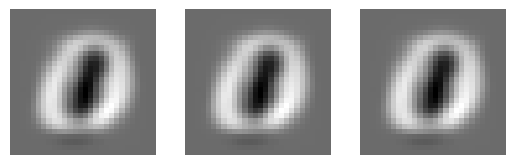

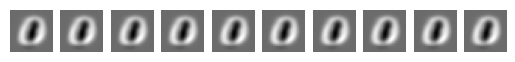

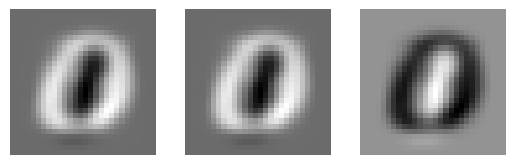

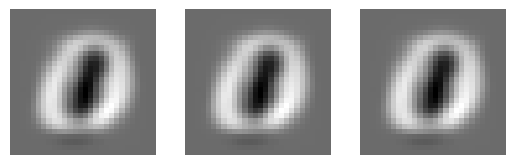

In [6]:
experiment_dimensional_reduction(1)

(784, 2) (60000, 2) (60000, 784)
Training error: 0.08975043892860413
Test error: 0.08948075771331787
PCA parameters count: 1568
Reduced data and PCA size relative to original data size: 0.0025843537414965987


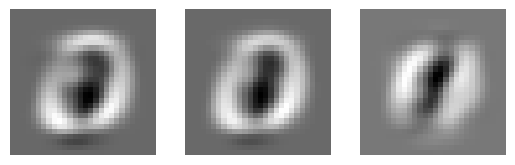

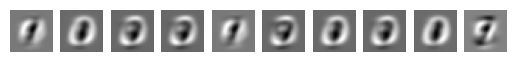

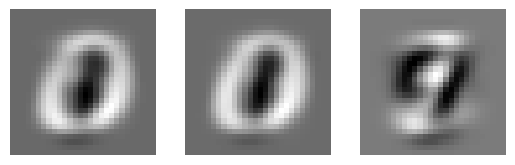

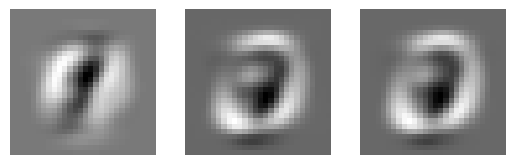

In [7]:
experiment_dimensional_reduction(2)

(784, 4) (60000, 4) (60000, 784)
Training error: 0.07675918191671371
Test error: 0.07658416032791138
PCA parameters count: 3136
Reduced data and PCA size relative to original data size: 0.005168707482993197


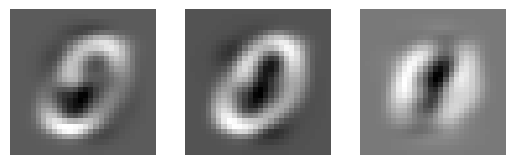

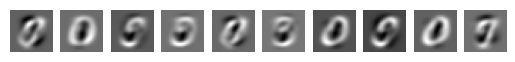

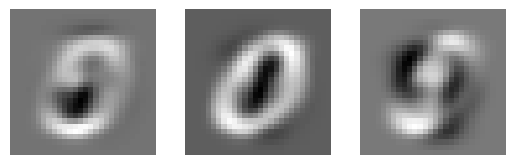

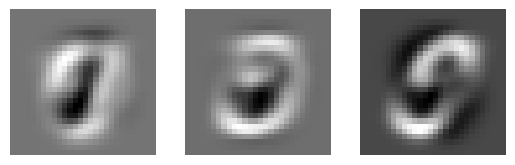

In [8]:
experiment_dimensional_reduction(4)

(784, 8) (60000, 8) (60000, 784)
Training error: 0.04411926493048668
Test error: 0.04393880069255829
PCA parameters count: 6272
Reduced data and PCA size relative to original data size: 0.010337414965986395


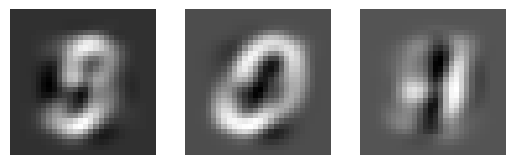

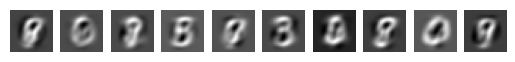

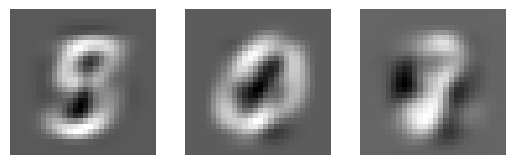

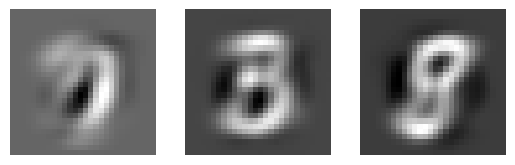

In [9]:
experiment_dimensional_reduction(8)

(784, 16) (60000, 16) (60000, 784)
Training error: 0.028739407658576965
Test error: 0.028687523677945137
PCA parameters count: 12544
Reduced data and PCA size relative to original data size: 0.02067482993197279


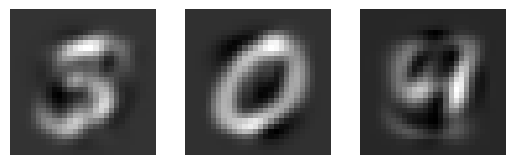

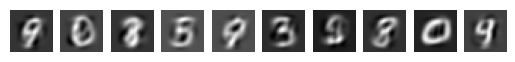

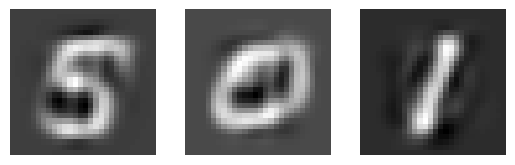

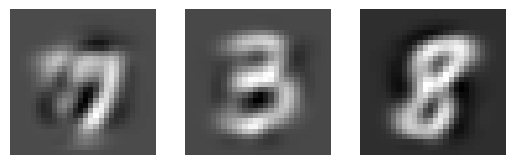

In [10]:
experiment_dimensional_reduction(16)

(784, 32) (60000, 32) (60000, 784)
Training error: 0.017575828358530998
Test error: 0.01758445054292679
PCA parameters count: 25088
Reduced data and PCA size relative to original data size: 0.04134965986394558


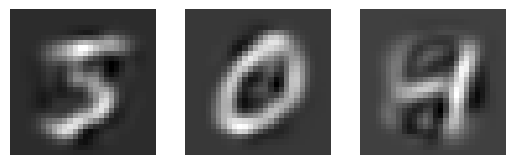

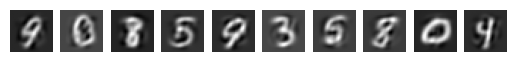

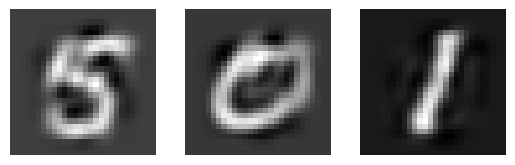

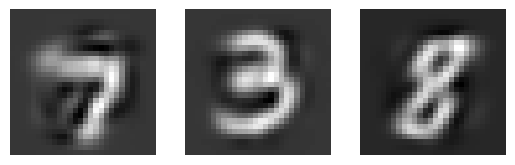

In [11]:
experiment_dimensional_reduction(32)

(784, 64) (60000, 64) (60000, 784)
Training error: 0.00938352756202221
Test error: 0.009426441043615341
PCA parameters count: 50176
Reduced data and PCA size relative to original data size: 0.08269931972789116


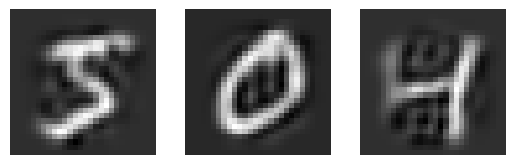

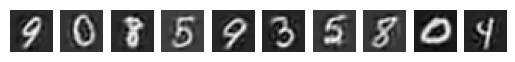

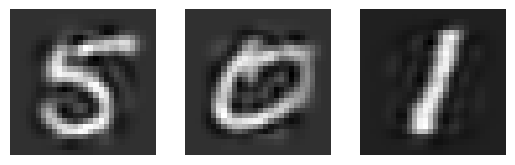

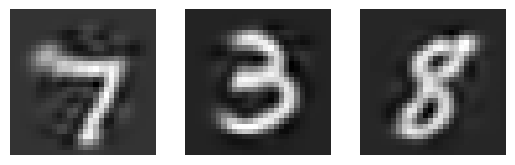

In [12]:
experiment_dimensional_reduction(64)

(784, 128) (60000, 128) (60000, 784)
Training error: 0.004287682007998228
Test error: 0.004318959545344114
PCA parameters count: 100352
Reduced data and PCA size relative to original data size: 0.16539863945578231


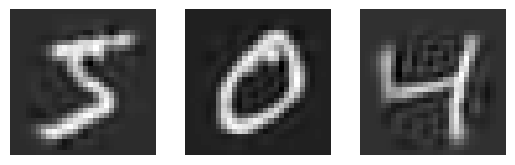

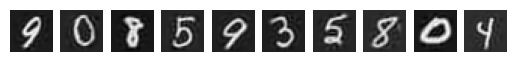

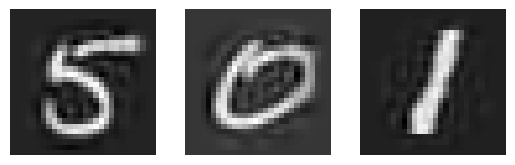

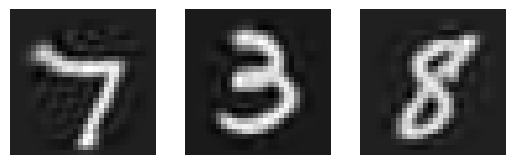

In [13]:
experiment_dimensional_reduction(128)

(784, 256) (60000, 256) (60000, 784)
Training error: 0.0013964945683255792
Test error: 0.0014180662110447884
PCA parameters count: 200704
Reduced data and PCA size relative to original data size: 0.33079727891156463


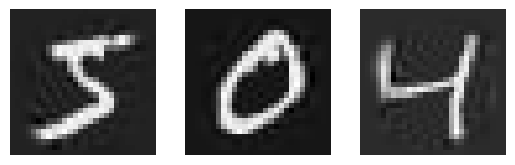

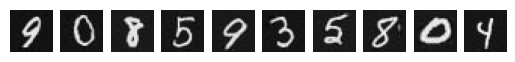

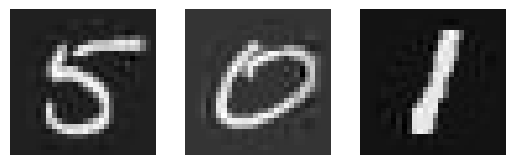

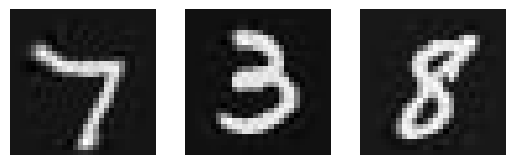

In [14]:
experiment_dimensional_reduction(256)

(784, 512) (60000, 512) (60000, 784)
Training error: 3.877203562296927e-05
Test error: 4.114907642360777e-05
PCA parameters count: 401408
Reduced data and PCA size relative to original data size: 0.6615945578231293


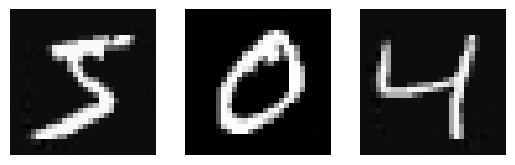

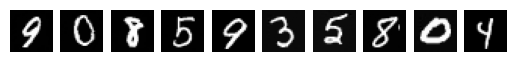

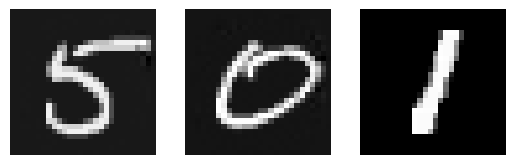

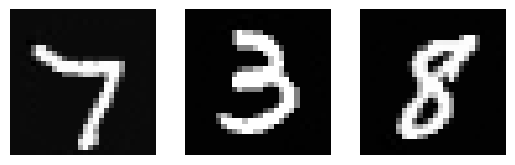

In [15]:
experiment_dimensional_reduction(512)

(784, 784) (60000, 784) (60000, 784)
Training error: 2.4333711586520257e-14
Test error: 2.4197268131244745e-14
PCA parameters count: 614656
Reduced data and PCA size relative to original data size: 1.0130666666666666


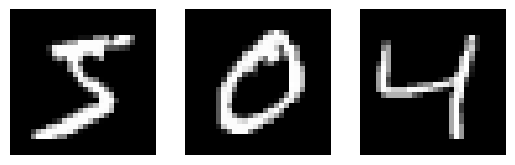

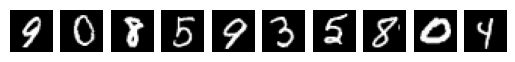

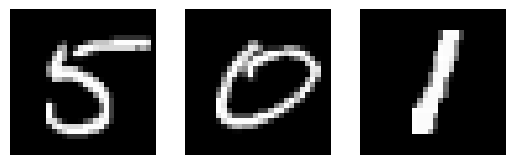

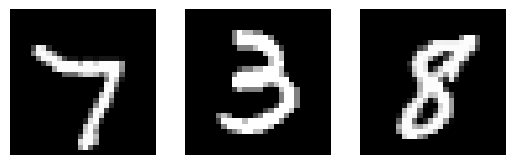

In [16]:
experiment_dimensional_reduction(components.shape[0])